In [1]:
# Author: Katrina Deloso
# In this notebook, I run a point analysis to see how educational attainment varies across LA County. 
# Several weeks ago, I used Census Reporter data to gather educational attainment by census tract, and then collapsed that educational attainment into more usable categories. I also calculated the percentage of educational attainment for each census tract, so that my data was adjusted for population
# For this assignment, I downloaded that dataframe from my previous notebook, since it already had been cleaned and sorted in a way that was helpful to me. 
# Since I was using census tracts as my unit of analysis, I had to convert the geometry from polygons to points, as you'll see below. Unfortunately, I couldn't figure out how to weight each point by the population of the census tract, so each census tract is given an equal point.
# This assignment provided a new way of visualizing the distribution of educational attainment across the county.


In [2]:
# the usuals
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx
from sodapy import Socrata

# new for data viz
import seaborn as sns

# to explore point patterns
from pointpats import centrography
from matplotlib.patches import Ellipse
import numpy

/opt/conda/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [3]:
# Here, I upload a dataframe that I had cleaned and sorted several weeks ago

In [4]:
gdf = gpd.read_file('LACensusEduc.geojson')

In [5]:
gdf.head()

,geoid,name,Total,No HS,HS Degree/,Some colle,Bachelors,Graduate D,Percent No,Percent HS,Percent So,Percent Ba,Percent Gr,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",3118.0,373.0,750.0,1374.0,278.0,243.0,11.962797,24.053881,44.066709,8.915972,7.793457,"POLYGON ((-118.30229 34.25870, -118.30091 34.2..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",2687.0,123.0,727.0,1157.0,277.0,362.0,4.577596,27.056197,43.059174,10.308895,13.472274,"POLYGON ((-118.30334 34.27371, -118.30330 34.2..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",4216.0,367.0,996.0,1809.0,449.0,285.0,8.704934,23.624288,42.907970,10.649905,6.759962,"POLYGON ((-118.29945 34.25598, -118.29792 34.2..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",2646.0,335.0,724.0,981.0,197.0,217.0,12.660620,27.362056,37.074830,7.445200,8.201058,"POLYGON ((-118.28593 34.25227, -118.28592 34.2..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3263.0,241.0,852.0,1241.0,336.0,500.0,7.385841,26.110941,38.032485,10.297272,15.323322,"POLYGON ((-118.27822 34.25068, -118.27822 34.2..."


In [6]:
# In the download and reupload process, my column titles are shortened, so I rename them to their full names

In [7]:
gdf.columns = ['geoid',
 'name',
 'Total',
 'No HS',
 'HS Degree/Diploma',
 'Some college, no Bachelors',
 'Bachelors degree',
 'Graduate Degree (incl Masters and PhD)',
 'Percent No HS',
 'Percent HS Degree/Diploma',
 'Percent Some college, no Bachelors',
 'Percent Bachelors degree',
 'Percent Graduate Degree (incl Masters and PhD)',
 'geometry']

In [8]:
# Next, I trim the gdf so that it only shows the adjusted educational attainment rates

In [9]:
gdf2 = gdf[['geoid',
 'name',
 'Total',
 'Percent No HS',
 'Percent HS Degree/Diploma',
 'Percent Some college, no Bachelors',
 'Percent Bachelors degree',
 'Percent Graduate Degree (incl Masters and PhD)',
 'geometry']]

In [10]:
gdf2.head()

,geoid,name,Total,Percent No HS,Percent HS Degree/Diploma,"Percent Some college, no Bachelors",Percent Bachelors degree,Percent Graduate Degree (incl Masters and PhD),geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",3118.0,11.962797,24.053881,44.066709,8.915972,7.793457,"POLYGON ((-118.30229 34.25870, -118.30091 34.2..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",2687.0,4.577596,27.056197,43.059174,10.308895,13.472274,"POLYGON ((-118.30334 34.27371, -118.30330 34.2..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",4216.0,8.704934,23.624288,42.907970,10.649905,6.759962,"POLYGON ((-118.29945 34.25598, -118.29792 34.2..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",2646.0,12.660620,27.362056,37.074830,7.445200,8.201058,"POLYGON ((-118.28593 34.25227, -118.28592 34.2..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3263.0,7.385841,26.110941,38.032485,10.297272,15.323322,"POLYGON ((-118.27822 34.25068, -118.27822 34.2..."


In [11]:
# When I plot my dataframe, it just shows me the entirety of LA County, since my geometry column involves polygons of each census tract


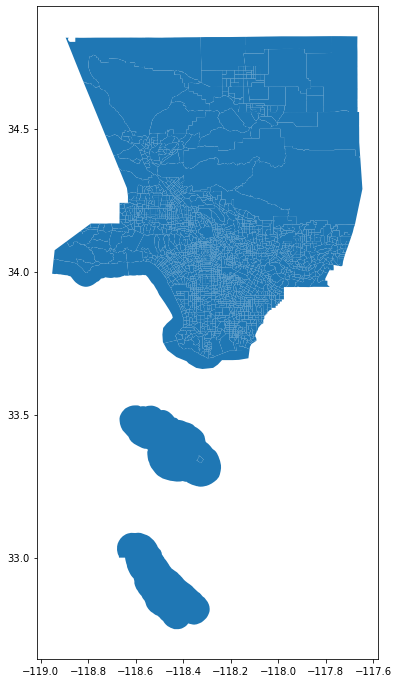

In [12]:
gdf2.plot(figsize=(12,12),
             markersize=0.5)

In [13]:
# Here, I project to webmercator so that I can get the appropriate points for the centroid of each census tract

In [14]:
gdf2=gdf2.to_crs('EPSG:3857')

In [15]:
# Here, I use a function I found on Stack Overflow to find the centroid of each census tract

In [16]:
def getXY(pt):
    return (pt.x, pt.y)
centroidseries = gdf2['geometry'].centroid
centroidseries


0       POINT (-13168315.068 4063696.445)
1       POINT (-13167998.981 4064807.468)
2       POINT (-13168063.937 4062820.838)
3       POINT (-13167051.133 4062637.132)
4       POINT (-13165867.273 4062255.529)
                      ...                
2341    POINT (-13164957.131 3993358.776)
2342    POINT (-13159829.938 3994890.428)
2343    POINT (-13223886.210 4028690.691)
2344    POINT (-13190581.582 4017231.468)
2345    POINT (-13169784.743 3989407.805)
Length: 2346, dtype: geometry

In [17]:
# Next, I add this list of centroid points to the gdf

In [18]:
gdf2['geometry points'] = centroidseries


In [19]:
gdf2.head()

,geoid,name,Total,Percent No HS,Percent HS Degree/Diploma,"Percent Some college, no Bachelors",Percent Bachelors degree,Percent Graduate Degree (incl Masters and PhD),geometry,geometry points
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",3118.0,11.962797,24.053881,44.066709,8.915972,7.793457,"POLYGON ((-13169350.794 4063591.834, -13169197...",POINT (-13168315.068 4063696.445)
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",2687.0,4.577596,27.056197,43.059174,10.308895,13.472274,"POLYGON ((-13169467.902 4065613.937, -13169463...",POINT (-13167998.981 4064807.468)
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",4216.0,8.704934,23.624288,42.907970,10.649905,6.759962,"POLYGON ((-13169034.646 4063225.625, -13168864...",POINT (-13168063.937 4062820.838)
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",2646.0,12.660620,27.362056,37.074830,7.445200,8.201058,"POLYGON ((-13167528.939 4062726.771, -13167528...",POINT (-13167051.133 4062637.132)
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3263.0,7.385841,26.110941,38.032485,10.297272,15.323322,"POLYGON ((-13166671.668 4062511.964, -13166671...",POINT (-13165867.273 4062255.529)


In [20]:
# Then, I drop the old geometry column and rename the new 'geometry points' column as my updated 'geometry' column

In [21]:
gdf = gdf2[['geoid',
 'name',
 'Total',
 'Percent No HS',
 'Percent HS Degree/Diploma',
 'Percent Some college, no Bachelors',
 'Percent Bachelors degree',
 'Percent Graduate Degree (incl Masters and PhD)',
 'geometry points']]

In [22]:
gdf.columns = ['geoid',
 'name',
 'Total',
 'Percent No HS',
 'Percent HS Degree/Diploma',
 'Percent Some college, no Bachelors',
 'Percent Bachelors degree',
 'Percent Graduate Degree (incl Masters and PhD)',
 'geometry']

In [23]:
gdf.head()

,geoid,name,Total,Percent No HS,Percent HS Degree/Diploma,"Percent Some college, no Bachelors",Percent Bachelors degree,Percent Graduate Degree (incl Masters and PhD),geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",3118.0,11.962797,24.053881,44.066709,8.915972,7.793457,POINT (-13168315.068 4063696.445)
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",2687.0,4.577596,27.056197,43.059174,10.308895,13.472274,POINT (-13167998.981 4064807.468)
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",4216.0,8.704934,23.624288,42.907970,10.649905,6.759962,POINT (-13168063.937 4062820.838)
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",2646.0,12.660620,27.362056,37.074830,7.445200,8.201058,POINT (-13167051.133 4062637.132)
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3263.0,7.385841,26.110941,38.032485,10.297272,15.323322,POINT (-13165867.273 4062255.529)


In [24]:
gdf = gpd.GeoDataFrame(gdf)

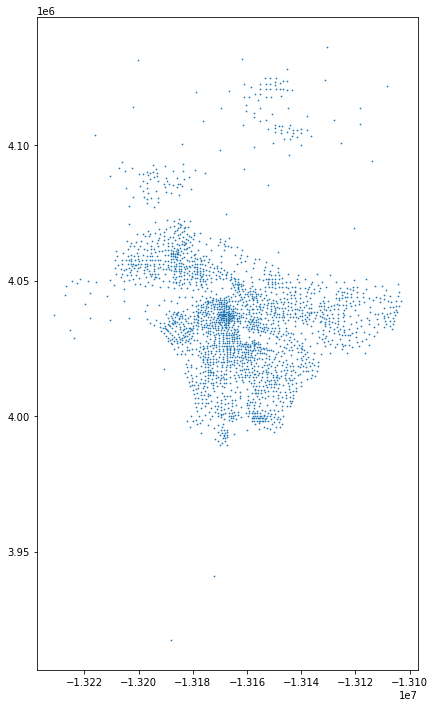

In [25]:
gdf.plot(figsize=(12,12),
             markersize=0.5)

In [26]:
# This map is sort of hard to interpret for me, so I add a basemap. The basemap makes the map above a lot clearer. 
# Central LA County has many more census tract points because the population is much denser, whereas the San Fernando Valley is more sparsely populated, so the census tracts are much larger geographically.
# The single census tract points at the bottom of the map represent Catalina Island and San Clemente Island.

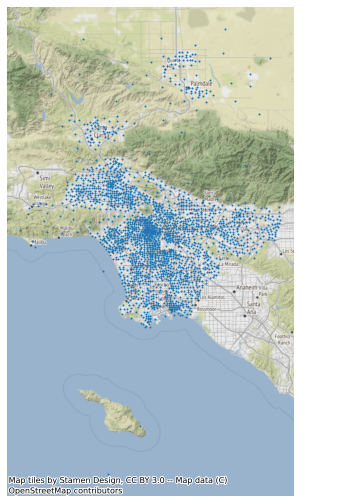

In [27]:
ax = gdf.plot(figsize=(9,9), markersize=1)
ax.axis('off')
ctx.add_basemap(ax)

In [28]:
# Since my data just shows the rates of each category of educational attainment for each census tract, I decide to look at what the highest education level attained is for each tract
# To do that, I follow the method we learned during last week's hackathon to create a new column that displays the educational attainment for the majority of the population
# That new column is called "majority", and it assigns a level of educational attainment to each census tract based on the rates of attainment in each tract


In [29]:
dct = {
    'Percent No HS': 'No HS', 
    'Percent HS Degree/Diploma': 'HS Degree/Diploma', 
    'Percent Some college, no Bachelors': 'Some college, no Bachelors',
    'Percent Bachelors degree': 'Bachelors degree',
    'Percent Graduate Degree (incl Masters and PhD)': 'Graduate Degree (incl Masters and PhD)'
}

In [30]:
gdf['majority'] = gdf[[
 'Percent No HS', 
 'Percent HS Degree/Diploma', 
 'Percent Some college, no Bachelors',
 'Percent Bachelors degree',
 'Percent Graduate Degree (incl Masters and PhD)'
]].idxmax(axis=1).map(dct)

In [31]:
gdf.sample(5)

,geoid,name,Total,Percent No HS,Percent HS Degree/Diploma,"Percent Some college, no Bachelors",Percent Bachelors degree,Percent Graduate Degree (incl Masters and PhD),geometry,majority
1733,14000US06037550800,"Census Tract 5508, Los Angeles, CA",5054.0,14.147210,22.417887,42.243767,6.588841,7.340720,POINT (-13151725.003 4022364.193),"Some college, no Bachelors"
84,14000US06037111400,"Census Tract 1114, Los Angeles, CA",6197.0,14.797483,27.368081,40.906890,5.454252,7.326126,POINT (-13190934.634 4063472.649),"Some college, no Bachelors"
13,14000US06037103300,"Census Tract 1033, Los Angeles, CA",2760.0,1.739130,18.152174,60.217391,6.739130,11.956522,POINT (-13175271.515 4063414.341),"Some college, no Bachelors"
1188,14000US06037405701,"Census Tract 4057.01, Los Angeles, CA",2485.0,11.267606,28.933602,40.362173,5.311871,7.686117,POINT (-13126919.593 4041399.134),"Some college, no Bachelors"
1503,14000US06037503301,"Census Tract 5033.01, Los Angeles, CA",2323.0,3.831253,25.053810,44.037882,16.487301,8.566509,POINT (-13137385.452 4021832.606),"Some college, no Bachelors"


In [32]:
# When I run a value count for the majority column, I'm surprised to find that the vast majority of census tracts have populations where the highest level of educational attainment is "Some college, no Bachelors"
# I double check to see what educational attainment is for the raw counts, rather than for rates, and it follows the same pattern
# I'm also very surprised to find that there's only 1 census tract where the majority of the population has completed a Bachelor's degree but has not attended graduate school
# My only explanation for this is that most census tracts may have a large number of individuals who are either in college, have an associate's degree, or dropped out of college
# While those census tracts still contain many people who do have a bachelor's degree, the proportion of people with "some college" may be just slightly larger, and in that case, the tract was labeled as "some college"


In [33]:
gdf.majority.value_counts()

Some college, no Bachelors                1709
No HS                                      408
HS Degree/Diploma                          199
Graduate Degree (incl Masters and PhD)       9
Bachelors degree                             1
Name: majority, dtype: int64

In [34]:
# Next, I drop all census tracts with no data (NaN)

In [35]:
gdf.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

,geoid,name,Total,Percent No HS,Percent HS Degree/Diploma,"Percent Some college, no Bachelors",Percent Bachelors degree,Percent Graduate Degree (incl Masters and PhD),geometry,majority
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",3118.0,11.962797,24.053881,44.066709,8.915972,7.793457,POINT (-13168315.068 4063696.445),"Some college, no Bachelors"
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",2687.0,4.577596,27.056197,43.059174,10.308895,13.472274,POINT (-13167998.981 4064807.468),"Some college, no Bachelors"
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",4216.0,8.704934,23.624288,42.907970,10.649905,6.759962,POINT (-13168063.937 4062820.838),"Some college, no Bachelors"
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",2646.0,12.660620,27.362056,37.074830,7.445200,8.201058,POINT (-13167051.133 4062637.132),"Some college, no Bachelors"
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3263.0,7.385841,26.110941,38.032485,10.297272,15.323322,POINT (-13165867.273 4062255.529),"Some college, no Bachelors"
...,...,...,...,...,...,...,...,...,...,...
2333,14000US06037980021,"Census Tract 9800.21, Los Angeles, CA",24.0,0.000000,50.000000,33.333333,0.000000,16.666667,POINT (-13177721.505 4064657.548),HS Degree/Diploma
2336,14000US06037980024,"Census Tract 9800.24, Los Angeles, CA",158.0,3.164557,21.518987,44.936709,8.860759,21.518987,POINT (-13190092.931 4052550.350),"Some college, no Bachelors"
2338,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",9.0,0.000000,0.000000,55.555556,0.000000,44.444444,POINT (-13166781.068 4065812.728),"Some college, no Bachelors"
2341,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",1088.0,5.974265,47.058824,33.731618,7.169118,4.044118,POINT (-13164957.131 3993358.776),HS Degree/Diploma


In [36]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

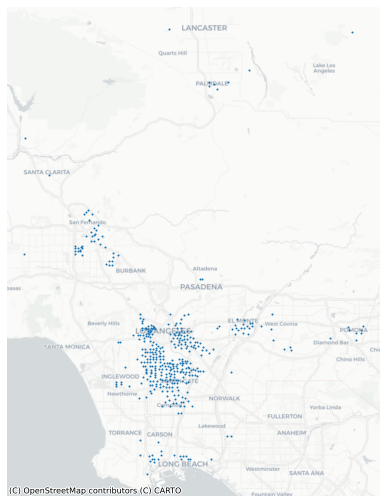

In [37]:
# map
ax = gdf[gdf.majority == 'No HS'].plot(figsize=(9,9), markersize=1)
ax.axis('off')
ctx.add_basemap(ax,
                source=ctx.providers.CartoDB.Positron)

In [38]:
# I create a function to show a table and map of census tracts where the majority of the population did not graduate high school

In [39]:
def highest_ed(majority='No HS'):
    # table
    display(gdf[gdf.majority == majority].head()) 

    # map
    ax = gdf[gdf.majority == majority].plot(figsize=(9,9), markersize=10)
    
    # axis
    ax.axis('off')

    # basemap
    ctx.add_basemap(ax,
                    source=ctx.providers.CartoDB.Positron)

In [40]:
# I create a list of all the educational categories, so that I can create an interactive map that toggles through this list

In [41]:
majoritylist = gdf.majority.unique().tolist()
majoritylist

['Some college, no Bachelors',
 'HS Degree/Diploma',
 'No HS',
 'Graduate Degree (incl Masters and PhD)',
 nan,
 'Bachelors degree']

In [42]:
@interact
def highest_ed(majority=majoritylist):
    display(gdf[gdf.majority == majority].head()) 
    ax = gdf[gdf.majority == majority].plot(figsize=(9,9), markersize=10)
    ax.axis('off')
    ctx.add_basemap(ax,
                    source=ctx.providers.CartoDB.Positron)

interactive(children=(Dropdown(description='majority', options=('Some college, no Bachelors', 'HS Degree/Diplo…

In [43]:
# Next, moving onto Seaborn plots. I need to make columns for the x and y values of each census tract point, and add it to my gdf


In [44]:
gdf['x'] = gdf.geometry.x
gdf['y'] = gdf.geometry.y
gdf.head()

,geoid,name,Total,Percent No HS,Percent HS Degree/Diploma,"Percent Some college, no Bachelors",Percent Bachelors degree,Percent Graduate Degree (incl Masters and PhD),geometry,majority,x,y
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",3118.0,11.962797,24.053881,44.066709,8.915972,7.793457,POINT (-13168315.068 4063696.445),"Some college, no Bachelors",-1.316832e+07,4.063696e+06
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",2687.0,4.577596,27.056197,43.059174,10.308895,13.472274,POINT (-13167998.981 4064807.468),"Some college, no Bachelors",-1.316800e+07,4.064807e+06
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",4216.0,8.704934,23.624288,42.907970,10.649905,6.759962,POINT (-13168063.937 4062820.838),"Some college, no Bachelors",-1.316806e+07,4.062821e+06
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",2646.0,12.660620,27.362056,37.074830,7.445200,8.201058,POINT (-13167051.133 4062637.132),"Some college, no Bachelors",-1.316705e+07,4.062637e+06
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3263.0,7.385841,26.110941,38.032485,10.297272,15.323322,POINT (-13165867.273 4062255.529),"Some college, no Bachelors",-1.316587e+07,4.062256e+06


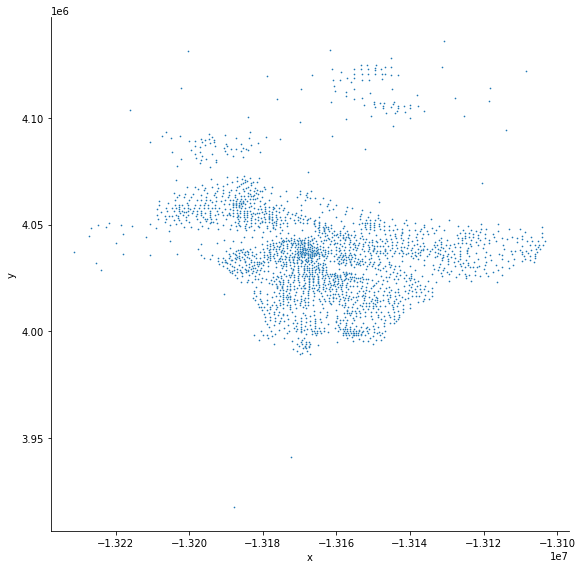

In [45]:
sns.relplot(data=gdf,
            x='x', 
            y='y',
            height=8,
            s=3)

In [46]:
color_list=['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

In [47]:
# I make a function to plot a map where each level of educational attainment has a different color 
# I set it so that the default color is 'PuBuGn', but it can still be changed through the entire list of colors

In [48]:
@interact
def majority_color(palette=color_list):
    sns.set_style('whitegrid')
    sns.relplot(data=gdf,
                x='x', 
                y='y',
                hue='majority',
                height=8,
                palette='PuBuGn',
                s=5)

interactive(children=(Dropdown(description='palette', options=('Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG…

In [49]:
# Next, I experiment with joint plots

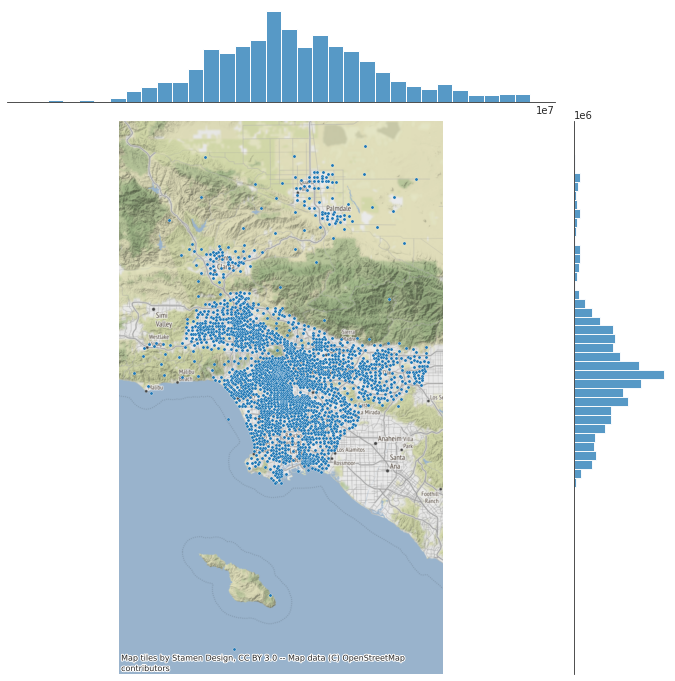

In [50]:
sns.set_style('white')
g = sns.jointplot(data = gdf,
                  x='x', 
                  y='y',
                  s=10,
                  height=10)
g.ax_joint.set_axis_off()
ctx.add_basemap(g.ax_joint) # g.ax_joint is the argument from seaborn to join

In [51]:
# For the next few cells, I play around a bit with different combinations of educational attainment. 
# First, I look at census tracts where the majority of the population has relatively low educational attainment - either they have not graduated high school, or they finished high school but have not pursued any higher ed.


In [52]:
gdf_nocollege = gdf[gdf.majority.isin(['No HS','HS Degree/Diploma'])]

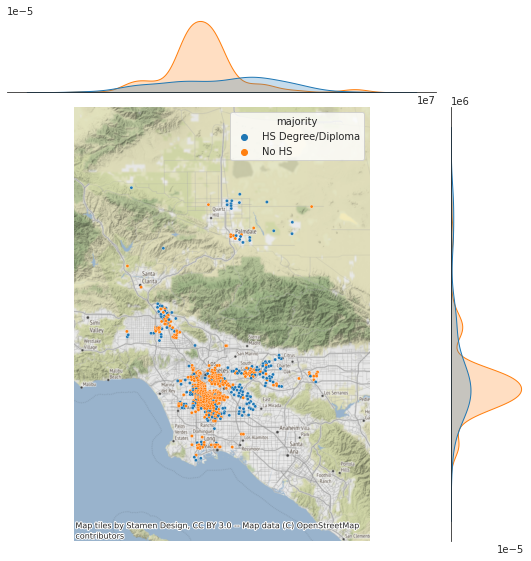

In [53]:
g = sns.jointplot(data = gdf_nocollege,
                  x='x', 
                  y='y',
                  hue='majority',
                  s=10,
                  height=8)
g.ax_joint.set_axis_off()
ctx.add_basemap(g.ax_joint)

In [54]:
# I then make a KDE plot to represent this data

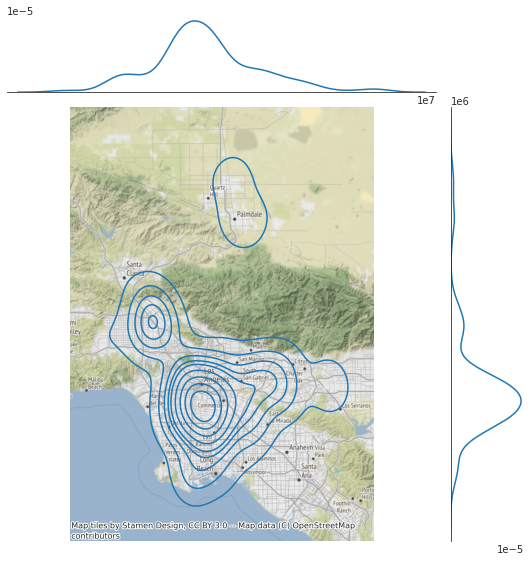

In [55]:
g = sns.jointplot(data = gdf_nocollege,
                  x='x', 
                  y='y',
                  kind='kde',
                  height=8)
g.ax_joint.set_axis_off()
ctx.add_basemap(g.ax_joint)

In [56]:
# And add color to the KDE plot!

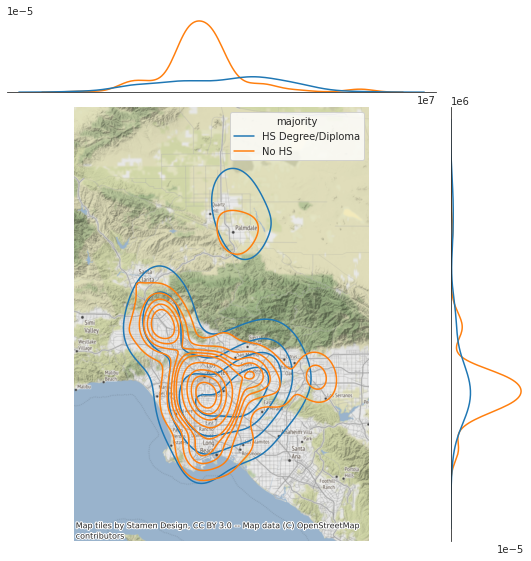

In [57]:
g = sns.jointplot(data = gdf_nocollege,
                  x='x', 
                  y='y',
                  kind='kde',
                  hue='majority',
                  height=8)
g.ax_joint.set_axis_off()
ctx.add_basemap(g.ax_joint)

In [58]:
# Next, I make a variable called ed_gap to look at how the greatest differences in educational attainment are dispersed
# I chose the lowest and highest levels of education to examine this


In [59]:
gdf_edgap = gdf[gdf.majority.isin(['No HS','Graduate Degree (incl Masters and PhD)'])]

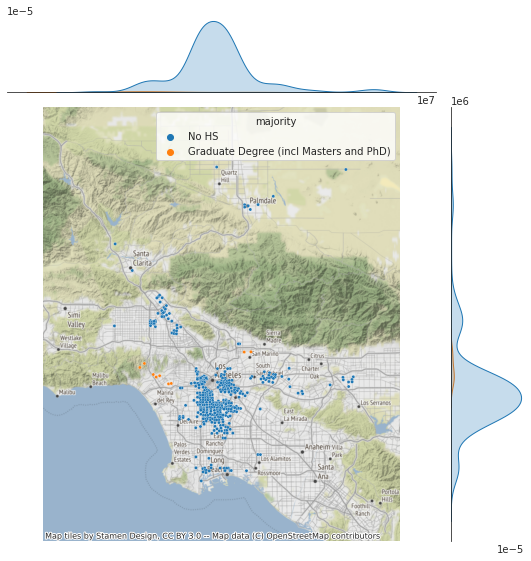

In [60]:
g = sns.jointplot(data = gdf_edgap,
                  x='x', 
                  y='y',
                  hue='majority',
                  s=10,
                  height=8)
g.ax_joint.set_axis_off()
ctx.add_basemap(g.ax_joint)

In [61]:
# As expected, the areas where the majority of the population have not graduated from high school vs. where the majority has a graduate degree do not overlap. 
#The areas where the majority of the public has a grad degree appear to be clustered around UCLA and CalTech, which makes sense.


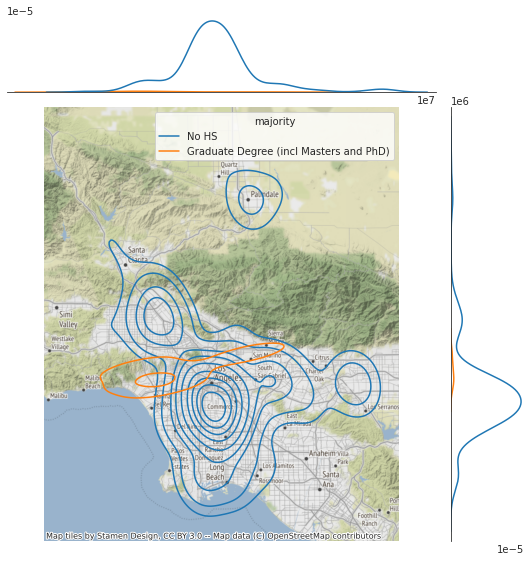

In [62]:
g = sns.jointplot(data = gdf_edgap,
                  x='x', 
                  y='y',
                  kind='kde',
                  hue='majority',
                  height=8)
g.ax_joint.set_axis_off()
ctx.add_basemap(g.ax_joint)

In [63]:
# I try mapping all the variation in education attainment. It's a little hard to interpret.

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


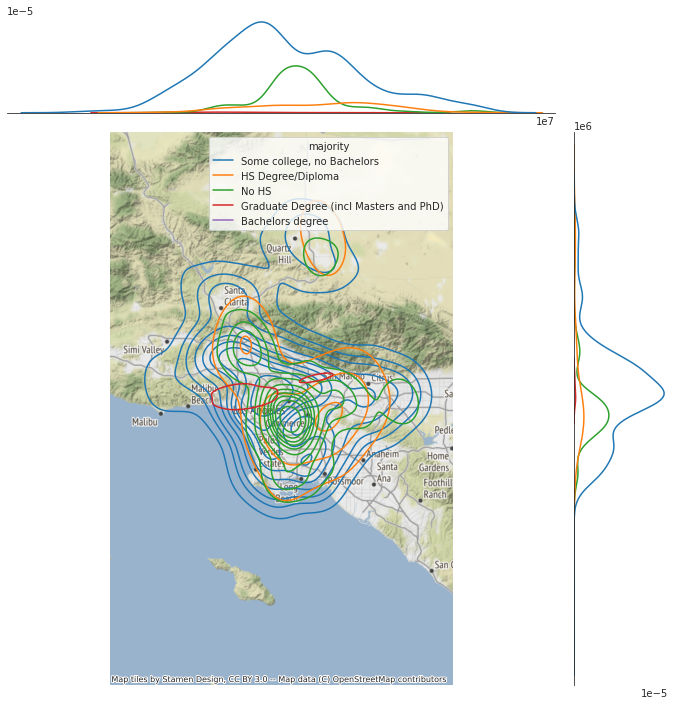

In [64]:
g = sns.jointplot(data = gdf,
                  x='x', 
                  y='y',
                  kind='kde',
                  hue='majority',
                  height=10)
g.ax_joint.set_axis_off()
ctx.add_basemap(g.ax_joint)

In [65]:
# The next maps demonstrate centography. First, I need to compute the mean and median centers and plot them

In [66]:
mean_center = centrography.mean_center(gdf[['x','y']])
med_center = centrography.euclidean_median(gdf[['x','y']])

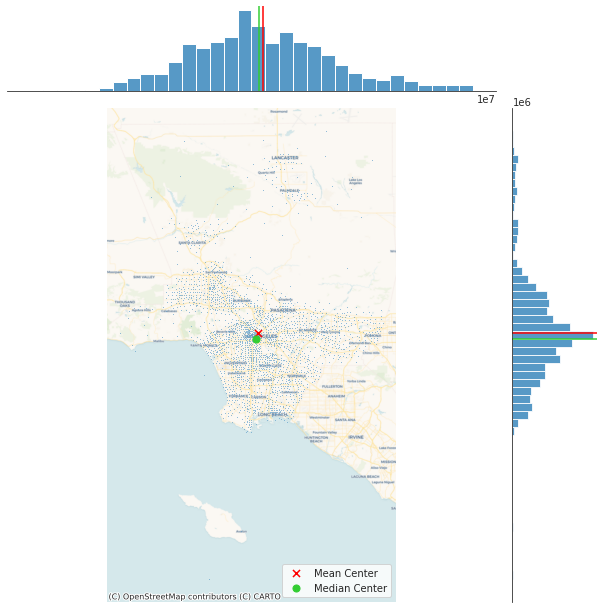

In [67]:
# Generate scatter plot
g = sns.jointplot(
    x='x', y='y', data=gdf, s=0.75, height=9
)

# Add mean point and marginal lines
g.ax_joint.scatter(
    *mean_center, color='red', marker='x', s=50, label='Mean Center'
)
g.ax_marg_x.axvline(mean_center[0], color='red')
g.ax_marg_y.axhline(mean_center[1], color='red')

# Add median point and marginal lines
g.ax_joint.scatter(
    *med_center, color='limegreen', marker='o', s=50, label='Median Center'
)
g.ax_marg_x.axvline(med_center[0], color='limegreen')
g.ax_marg_y.axhline(med_center[1], color='limegreen')

# Legend
g.ax_joint.legend()

# Add basemap
ctx.add_basemap(
    g.ax_joint, source=ctx.providers.CartoDB.Voyager)

# Clean axes
g.ax_joint.set_axis_off()

# Display
plt.show()


In [68]:
# Next, I want to look at distribution around the mean and median, so I create an ellipse of the data

In [69]:
major, minor, rotation = centrography.ellipse(gdf[['x','y']])

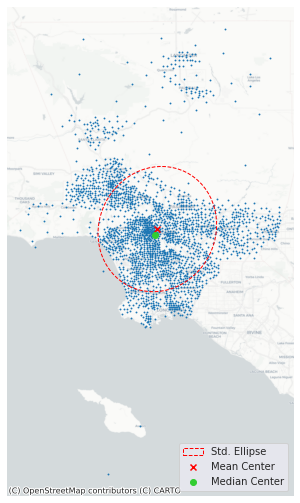

In [70]:
# set the style without grid lines
sns.set_style('dark')

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# Plot points
ax.scatter(gdf['x'], gdf['y'], s=0.75)
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                  width=major*2, # centrography.ellipse only gives half the axis
                  height=minor*2, 
                  angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                  facecolor='none', 
                  edgecolor='red', 
                  linestyle='--',
                  label='Std. Ellipse')

ax.add_patch(ellipse)

ax.legend()

ax.axis('off')

# add a basemap
ctx.add_basemap(ax,
                source=ctx.providers.CartoDB.Positron)

# Display
plt.show()

In [71]:
# Finally, I turn this into an interactive map showing ellipses for each educational level. 
# To do that, I need to write a function and create a list of the levels of educational attainment, then plot everything
# Since nearly all of the census tracts have"some college" as their majority of educational attainment, the ellipse for that level of attainment looks just like the ellipse for LA County census tracts in the previous cell


In [72]:
@interact

def ed_ellipse(edattained=gdf.majority.unique().tolist()):
    ed_filtered = gdf[gdf.majority == edattained]
    mean_center = centrography.mean_center(ed_filtered[['x','y']])
    med_center = centrography.euclidean_median(ed_filtered[['x','y']])
    major, minor, rotation = centrography.ellipse(ed_filtered[['x','y']])
    f, ax = plt.subplots(1, figsize=(9,9))
    ax.scatter(ed_filtered['x'], ed_filtered['y'], s=0.75)
    ax.scatter(*mean_center, color='purple', marker='x', label='Mean Center')
    ax.scatter(*med_center, color='blue', marker='o', label='Median Center')
    ellipse = Ellipse (xy=mean_center,
                       width=major*2,
                       height=minor*2,
                       angle=numpy.rad2deg(rotation),
                       facecolor='none',
                       edgecolor='purple',
                       linestyle='--',
                       label='Std. Ellipse'
                      )
    ax.add_patch(ellipse)
    ax.legend()
    ax.axis('Off')
    ax.set_title('There are '+ str(len(ed_filtered)) + ' census tracts where the highest educational attainment of the majority of the population is "' + edattained + '"')
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager)
    plt.show()

interactive(children=(Dropdown(description='edattained', options=('Some college, no Bachelors', 'HS Degree/Dip…